# Counting Cells in Microscopic Images

**by [Tony Kabilan Okeke](mailto:tko35@drexel.edu)**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import the bmes package
import sys, os
sys.path.append(os.environ['BMESAHMETDIR'])
import bmes

os.chdir('homework')

# Install necessary packages
bmes.pipinstall('skimage','scikit-image')

# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np

from hwbmeimg_countcells import bmeimg_countcells

Number of cells: 1


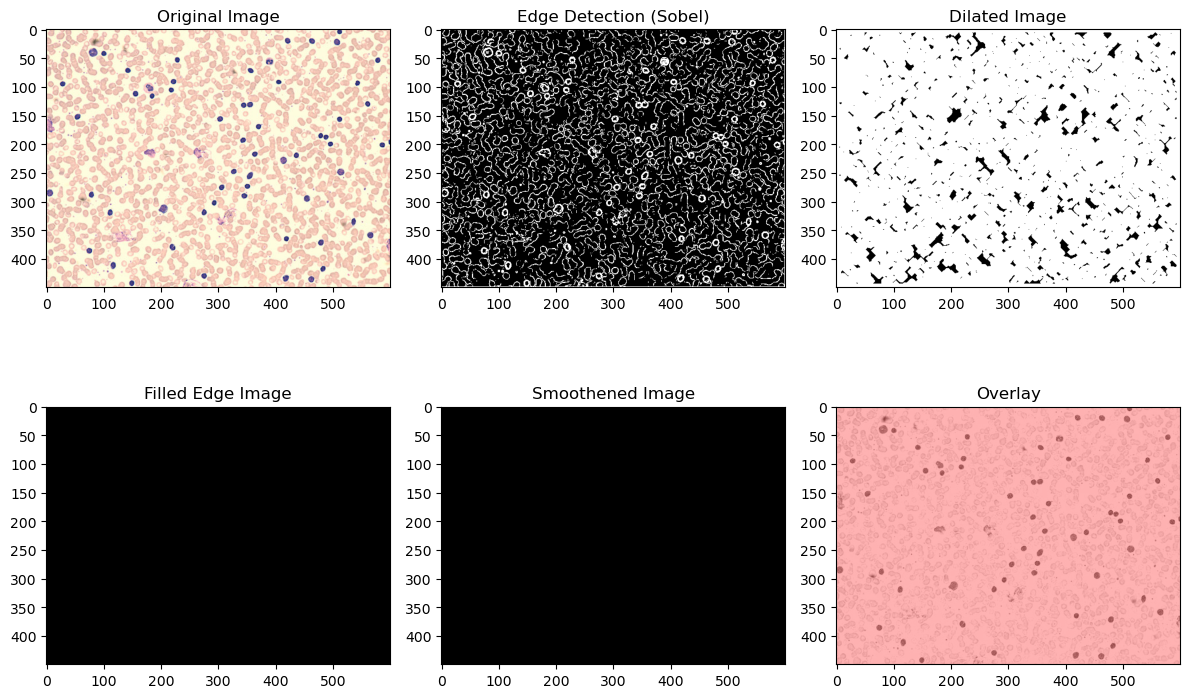

In [3]:
# Test default image
cellcount = bmeimg_countcells(dbg=True)
print(f'Number of cells: {cellcount}')

- Find and download your own image example
  - If the image is available as a URL, use `bmes.downloadurl()` to download it
  - If the image is not available as a URL, manually place a copy of it in the
    same folder as this script, and hard-code the file name
- Use the following line if you have a URL
  - `file = bmes.downloadurl('ENTER YOUR OWN URL', 'samplecells2.jpg')`
- Use the following line if you have a local file
  - `file = './samplecells2.jpg'`

Number of cells: 35


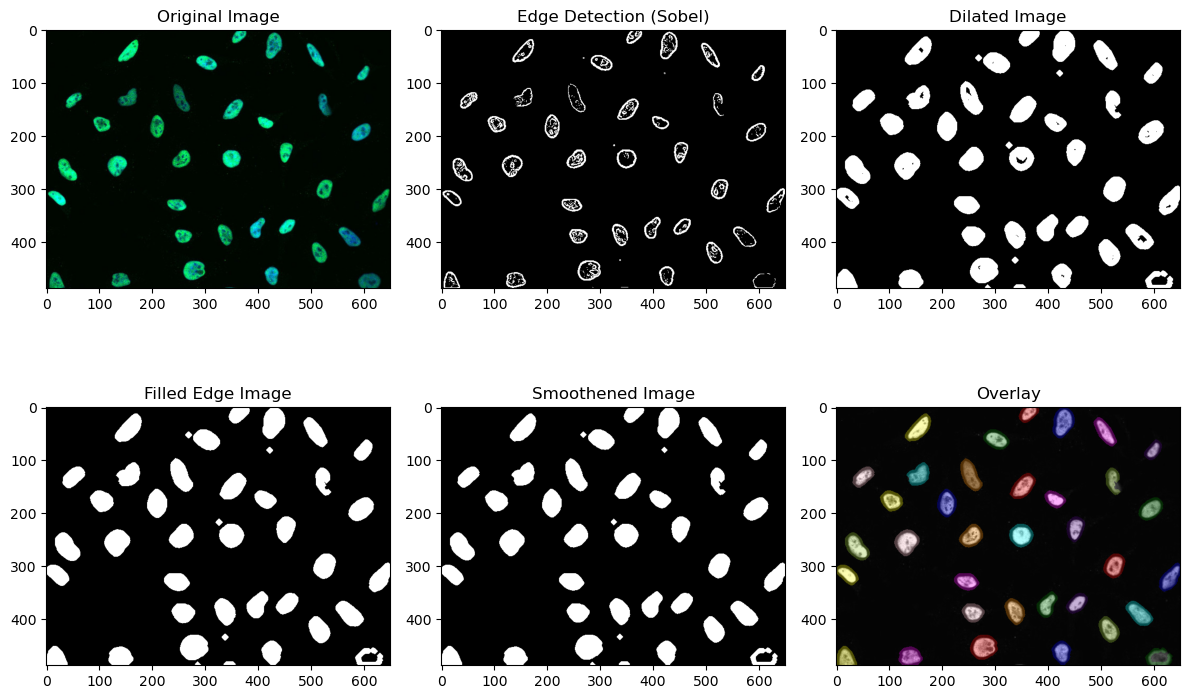

In [4]:
# Download the image
URL = ('https://www.thermofisher.com/antibody/images/650/'
       'MA5-29428-MSH6-ICCIF-1-2021112113224.jpg')
file = bmes.downloadurl(URL, './samplecells2.jpg')

# Count the cells
cellcount = bmeimg_countcells(file, dbg=True)
print('Number of cells: %d' % cellcount)

- Choose a parameter used in one of the image processing steps used in 
  `bmeimg_countcells()`. Extend the function bmeimg_countcells() to take an
  additional input argument for this parameter. In the function use a default
  value when the parameter is not given as input.

- Analyze the dependency of the cell count found on this parameter, by calling
  `bmeimg_countcells()` for a range of values for this parameter. Create a plot
  for the parameter value vs. number of cells found.

**Parameter:** I will look at the impact of varying the edge detection threshold
on the number of cells detected. Since `filters.sobel()` returns a grayscale
image, `edge_thr` is used to convert the image to a binary image. Intensity
values above `edge_thr` are set to 1, and those below are set to 0.

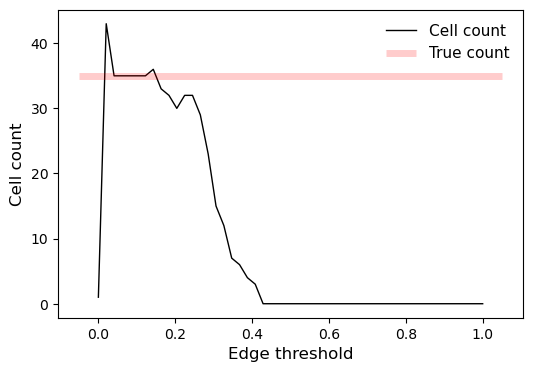

In [5]:
# Define range to vary the threshold
thr_range = np.linspace(0.0, 1, 50)
cellcount = np.zeros(thr_range.shape)

# Count the cells for different thresholds
for i, rad in enumerate(thr_range):
    cellcount[i] = bmeimg_countcells(file, dbg=False, edge_thr=rad)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(thr_range, cellcount, 'k-', lw=1, label='Cell count')
ax.hlines(35, ax.get_xlim()[0], ax.get_xlim()[1], 'r', lw=5, alpha=0.2, 
          label='True count')
ax.set_xlabel('Edge threshold', fontsize=12)
ax.set_ylabel('Cell count', fontsize=12)
ax.legend(fontsize=11, frameon=False)